# KNN

Implementing KNN algorithm and test it on the a subset of CIFAR10 dataset.


In [1]:
# Import Packages/
import numpy as np
import matplotlib.pyplot as plt


## Prepare Dataset

Since CIFAR10 is a relative large dataset, and KNN is quite time-consuming method, we only a small sub-set of CIFAR10 for KNN part

In [2]:
from utils.data_processing import get_cifar10_data

# Use a subset of CIFAR10 for KNN assignments
dataset = get_cifar10_data(subset_train=5000, subset_val=250, subset_test=500)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)


dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)


## Implementation

Implementationof  the KNN method in `algorithms/knn.py`.

For KNN implementation, there are two versions.

* Two Loop Version: use one loop to iterate through training samples and one loop to iterate through test samples
* One Loop Version: use one loop to iterate through test samples and use broadcast feature of numpy to calculate all the distance at once

In [3]:
from algorithms import KNN

knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)


### Compare the time consumption of different method

In this section, you will test your different implementation of KNN method, and compare their speed.

In [4]:
from utils.evaluation import get_classification_accuracy


#### Two Loop Version:

In [5]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=2)
print("Two Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


Two Loop Prediction Time: 14.471889972686768
Test Accuracy: 0.278


#### One Loop Version 

In [6]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=1)
print("One Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


One Loop Prediction Time: 11.669211149215698
Test Accuracy: 0.278


## Test different Hyper-parameter

For KNN, there is only one hyper-parameter of the algorithm: How many nearest neighbour to use(**K**).

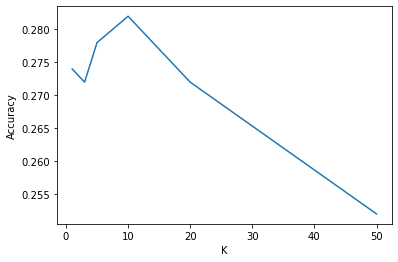

In [7]:
accuracies = []

k_candidates = [1, 3, 5, 10, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


In [8]:
accuracies

[0.274, 0.272, 0.278, 0.282, 0.272, 0.252]